In [1]:
import numpy as np
import umap
import matplotlib.pyplot as plt
from collections import Counter
import anndata as ad

input_dir = "out/data/"
output_dir = ""
num_top_lg_toplot = 5

# Load dataset
data = np.load("/Users/apple/Desktop/KB/data/feat_509/feat_509__bs25_temp0.5_larry_whole/scBaseEncoderFeat_Z_bs25_tau0.5.npy")
adata_subset = ad.read_h5ad("/Users/apple/Desktop/KB/data/LarryData/Larry_41201_2000.h5ad")
labels = adata_subset.obs["clone_id"].to_numpy()
categories = adata_subset.obs['Cell type annotation'].to_numpy()  

print("data shape", data.shape)
print("labels shape", labels.shape)

# Initialize UMAP and fit the datab
reducer = umap.UMAP()
embedding = reducer.fit_transform(data)


data shape (41201, 64)
labels shape (41201,)


/var/folders/ql/mhz506t52bjgn30w6f4wqhv40000gn/T/ipykernel_46334/735925514.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap('tab20', len(unique_categories))  # 'tab20' has 20 distinct colors


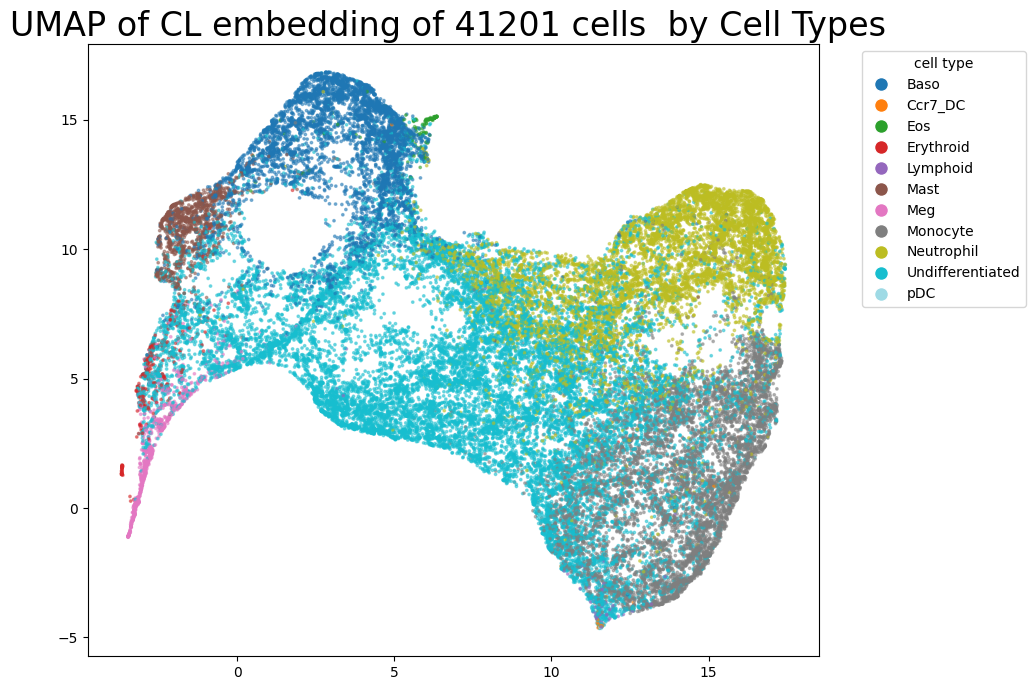

In [2]:
# Map each unique category to a specific color
unique_categories = np.unique(categories)
# Select a colormap
colormap = plt.cm.get_cmap('tab20', len(unique_categories))  # 'tab20' has 20 distinct colors
category_to_color = {category: colormap(i) for i, category in enumerate(unique_categories)}

# Convert categories to colors
category_colors = np.array([category_to_color[category] for category in categories])


# Plot the UMAP embedding with dots colored according to 'categories'
plt.figure(figsize=(10, 7))
scatter = plt.scatter(embedding[:, 0], embedding[:, 1], c=category_colors, s=3, alpha=0.5)
plt.title('UMAP of CL embedding of 41201 cells  by Cell Types ', fontsize=24)

# Create a legend
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colormap(i), markersize=10) for i in range(len(unique_categories))]
plt.legend(handles, unique_categories, title="cell type", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


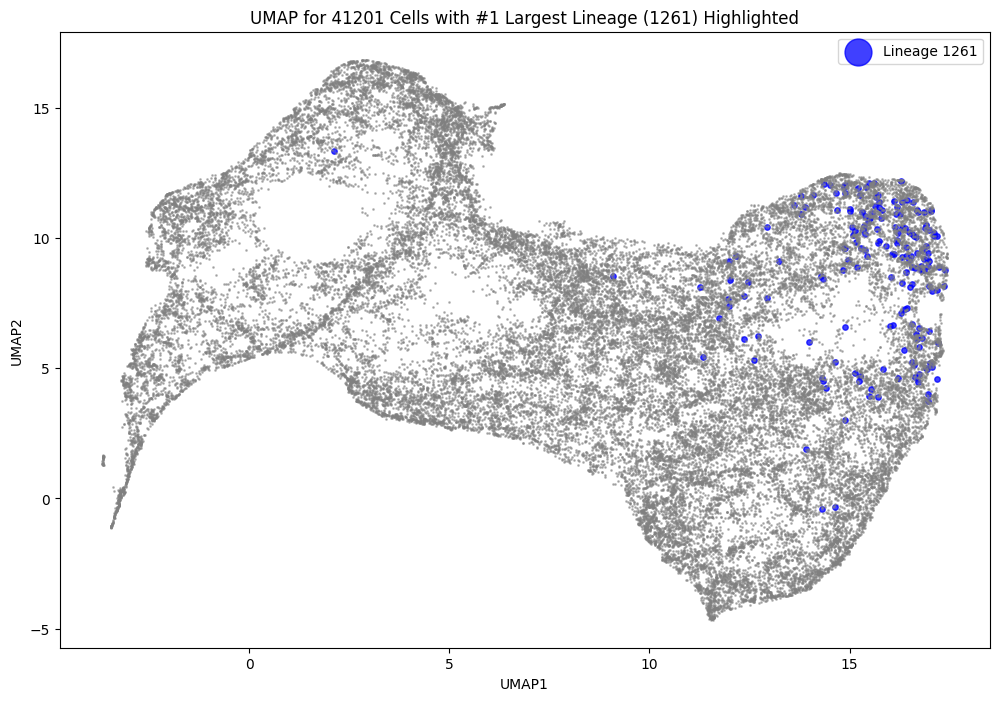

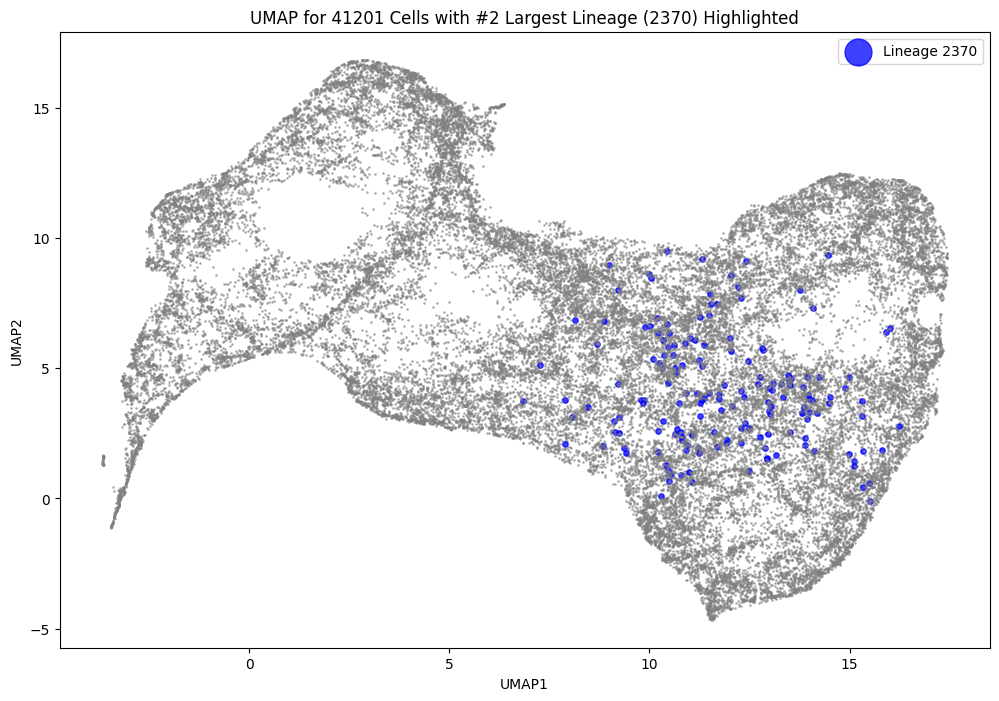

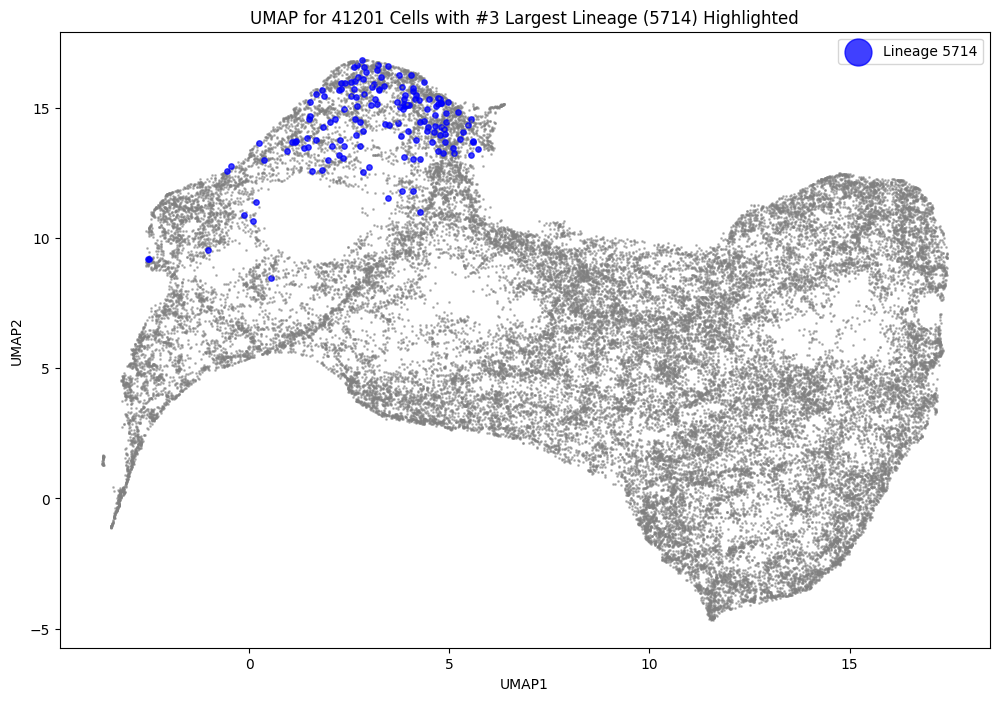

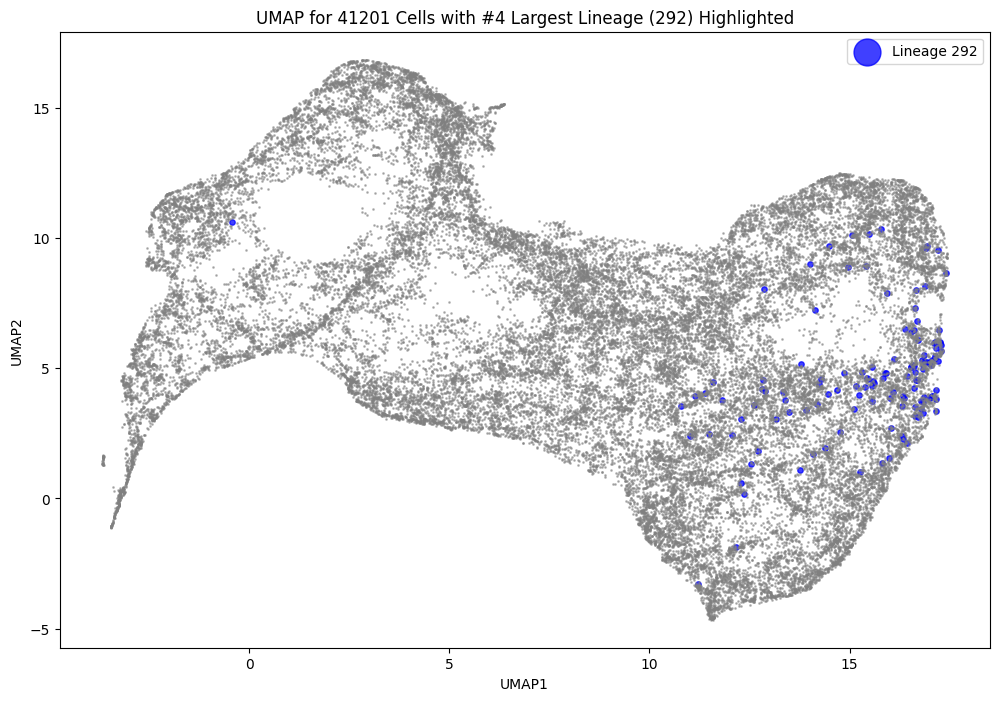

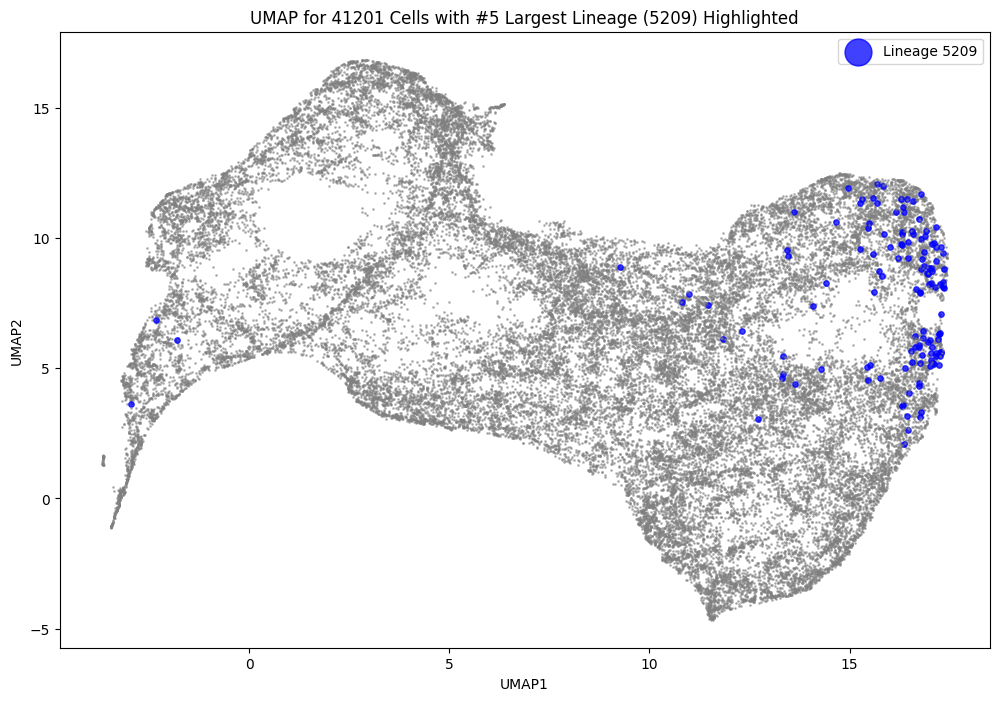

In [3]:
# Determine the top lineages

unique_labels, counts = np.unique(labels, return_counts=True)
top_lineages = unique_labels[np.argsort(-counts)[:num_top_lg_toplot]]

default_color = 'gray'

for i, lineage in enumerate(top_lineages):
    plt.figure(figsize=(12, 8))
    for label in np.unique(labels):
        subset = embedding[labels == label]
        if label == lineage:
            plt.scatter(subset[:, 0], subset[:, 1], s=15, label=f"Lineage {label}", alpha=0.75, color= "blue")
        else:
            plt.scatter(subset[:, 0], subset[:, 1], s=1, color=default_color, alpha=0.5)

    plt.title(f'UMAP for 41201 Cells with #{i+1} Largest Lineage ({lineage}) Highlighted')
    plt.xlabel('UMAP1')
    plt.ylabel('UMAP2')
    plt.legend(markerscale=5)
    plt.savefig(output_dir + f'cell_umap_{i}_largest_plot.png', dpi=300)
    plt.show()


In [ ]:
default_color = 'gray'

for i, lineage in enumerate(top_lineages):
    plt.figure(figsize=(12, 8))
    for label in np.unique(labels):
        subset = embedding[labels == label]
        if label == lineage:
            # For the top lineage, color by category
            for category in np.unique(categories[labels == label]):
                category_subset = subset[categories[labels == label] == category]
                plt.scatter(category_subset[:, 0], category_subset[:, 1], s=15, label=f"Lineage {label}, Cell Type {category}", alpha=1)
        else:
            plt.scatter(subset[:, 0], subset[:, 1], s=1, color=default_color, alpha=0.4)

    plt.title(f'UMAP for 41201 Cells with #{i+1} Largest Lineage ({lineage}) by Cell Type Highlighted')
    plt.xlabel('UMAP1')
    plt.ylabel('UMAP2')
    plt.legend(markerscale=5)
    plt.savefig(output_dir + f'cell_umap_{i}_largest_plot_by_CellType.png', dpi=300)
    plt.show()
